# Prediction and ploting in original MJD range, one PDF

Before running this script, you must create the following folders in the directory where your Python notebook is located:
1. ./output/predictions/train/plots -- folder for saving training plots
2. ./output/predictions/test/plots -- folder for saving test plots 
3. ./output/predictions/val/plots -- folder for saving validation plots
4. ./output/predictions/train/data -- folder for sving train data
5. ./output/predictions/test/data -- folder for saving test data
6. ./output/predictions/val/data -- folder for saving val data

In [1]:
import QNPy #Importing the package
#Importing PREDICTION_onePDF_original_mjd module from the package
from QNPy import PREDICTION_onePDF_original_mjd as pop
#Importing all packages from PREDICTION_onePDF_original_mjd module
from QNPy.PREDICTION_onePDF_original_mjd import * 
#The functions plot_function2, back_x, back_y and find_LC_transorm must be imported separately
from QNPy.PREDICTION_onePDF_original_mjd import plot_function2, back_x, back_y, find_LC_transform 

In [2]:
#defining the device, it can be cpu or cuda
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
# Creating all needed folders
# If you already manually created prediction folders, this can be scipped
pop.create_prediction_folders()

Folder already exists: ./output/predictions/train
Folder already exists: ./output/predictions/train/plots
Folder already exists: ./output/predictions/train/data
Folder already exists: ./output/predictions/test
Folder already exists: ./output/predictions/test/plots
Folder already exists: ./output/predictions/test/data
Folder already exists: ./output/predictions/val
Folder already exists: ./output/predictions/val/plots
Folder already exists: ./output/predictions/val/data


In [4]:
DATA_PATH_TRAIN = "./dataset/train" #path to train folder
DATA_PATH_VAL = "./dataset/val" #path to val folder
DATA_PATH_TEST="./dataset/test" #path to test folder
OUTPUT_PATH = "./output/predictions/" #path where to save the plots and data

MODEL_PATH = "./output/cnp_model.pth" #path to saved model

In [5]:
clearfolders=pop.clear_output_dir(OUTPUT_PATH)#clearing the output directorium, it can be sciped

In [6]:
model = pop.load_model(MODEL_PATH, device)#loading trained model

In [7]:
criterion, mseMetric=pop.get_criteria()#loading criterion adn metrics

In [8]:
#deleting the padded values from test set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/test"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: 3_original_split22.csv


In [9]:
#deleting the padded values from train set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/train"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: 9_original_split23.csv
Removed padding in file: 4_original_split21.csv
Removed padding in file: 1_original_split7.csv
Removed padding in file: 7_original_split12.csv


In [10]:
#deleting the padded values from val set
#deleting the curves that we add with plus and minus errors
#filtering the original curves for plotting


folder_path = "./dataset/val"  # Change this to your dataset folder

pop.remove_padded_values_and_filter(folder_path)

Removed padding in file: 5_original_split17.csv
Removed padding in file: 2_original_split16.csv
Removed padding in file: 8_original_split28.csv
Removed padding in file: 10_original_split19.csv
Removed padding in file: 6_original_split10.csv


In [11]:
tr=pop.load_trcoeff()#loading the transformation coeff

In [12]:
testSet, testLoader=pop.load_test_data(DATA_PATH_TEST)#loading test data

In [13]:
trainSet, trainLoader=pop.load_train_data(DATA_PATH_TRAIN)#loading train data

In [14]:
valSet, valLoader = pop.load_val_data(DATA_PATH_VAL)#loading validation data

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 19.89it/s]

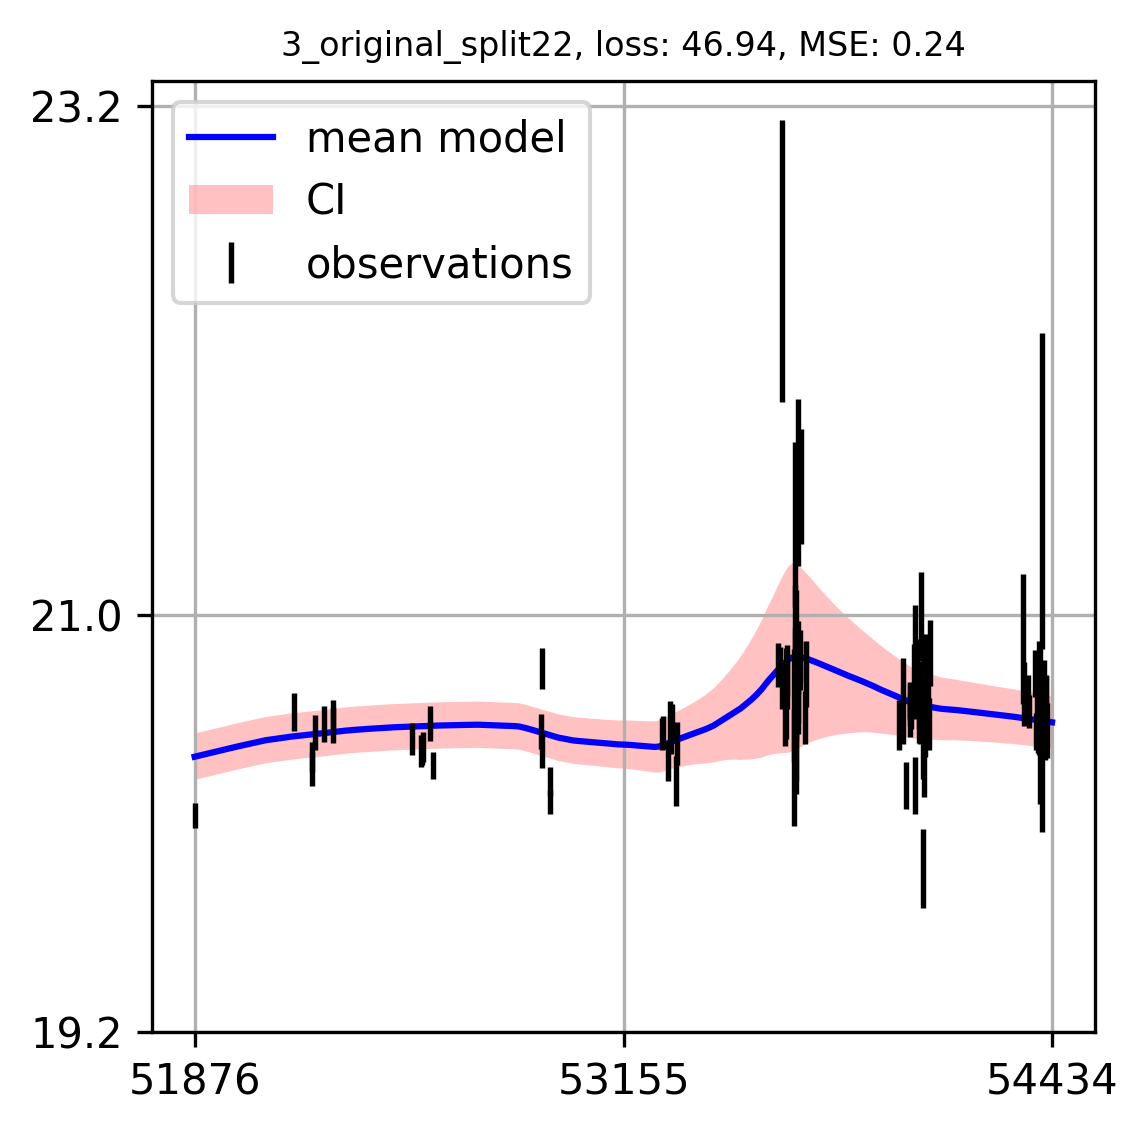

In [15]:
#prediction and plotting od test data
testMetrics=pop.plot_test_light_curves(model, testLoader, criterion, mseMetric, plot_function2, device,tr)

In [16]:
savetest=pop.save_test_metrics(OUTPUT_PATH, testMetrics)#saving the test metrics

100%|█████████████████████████████████████████████| 4/4 [00:00<00:00, 42.42it/s]


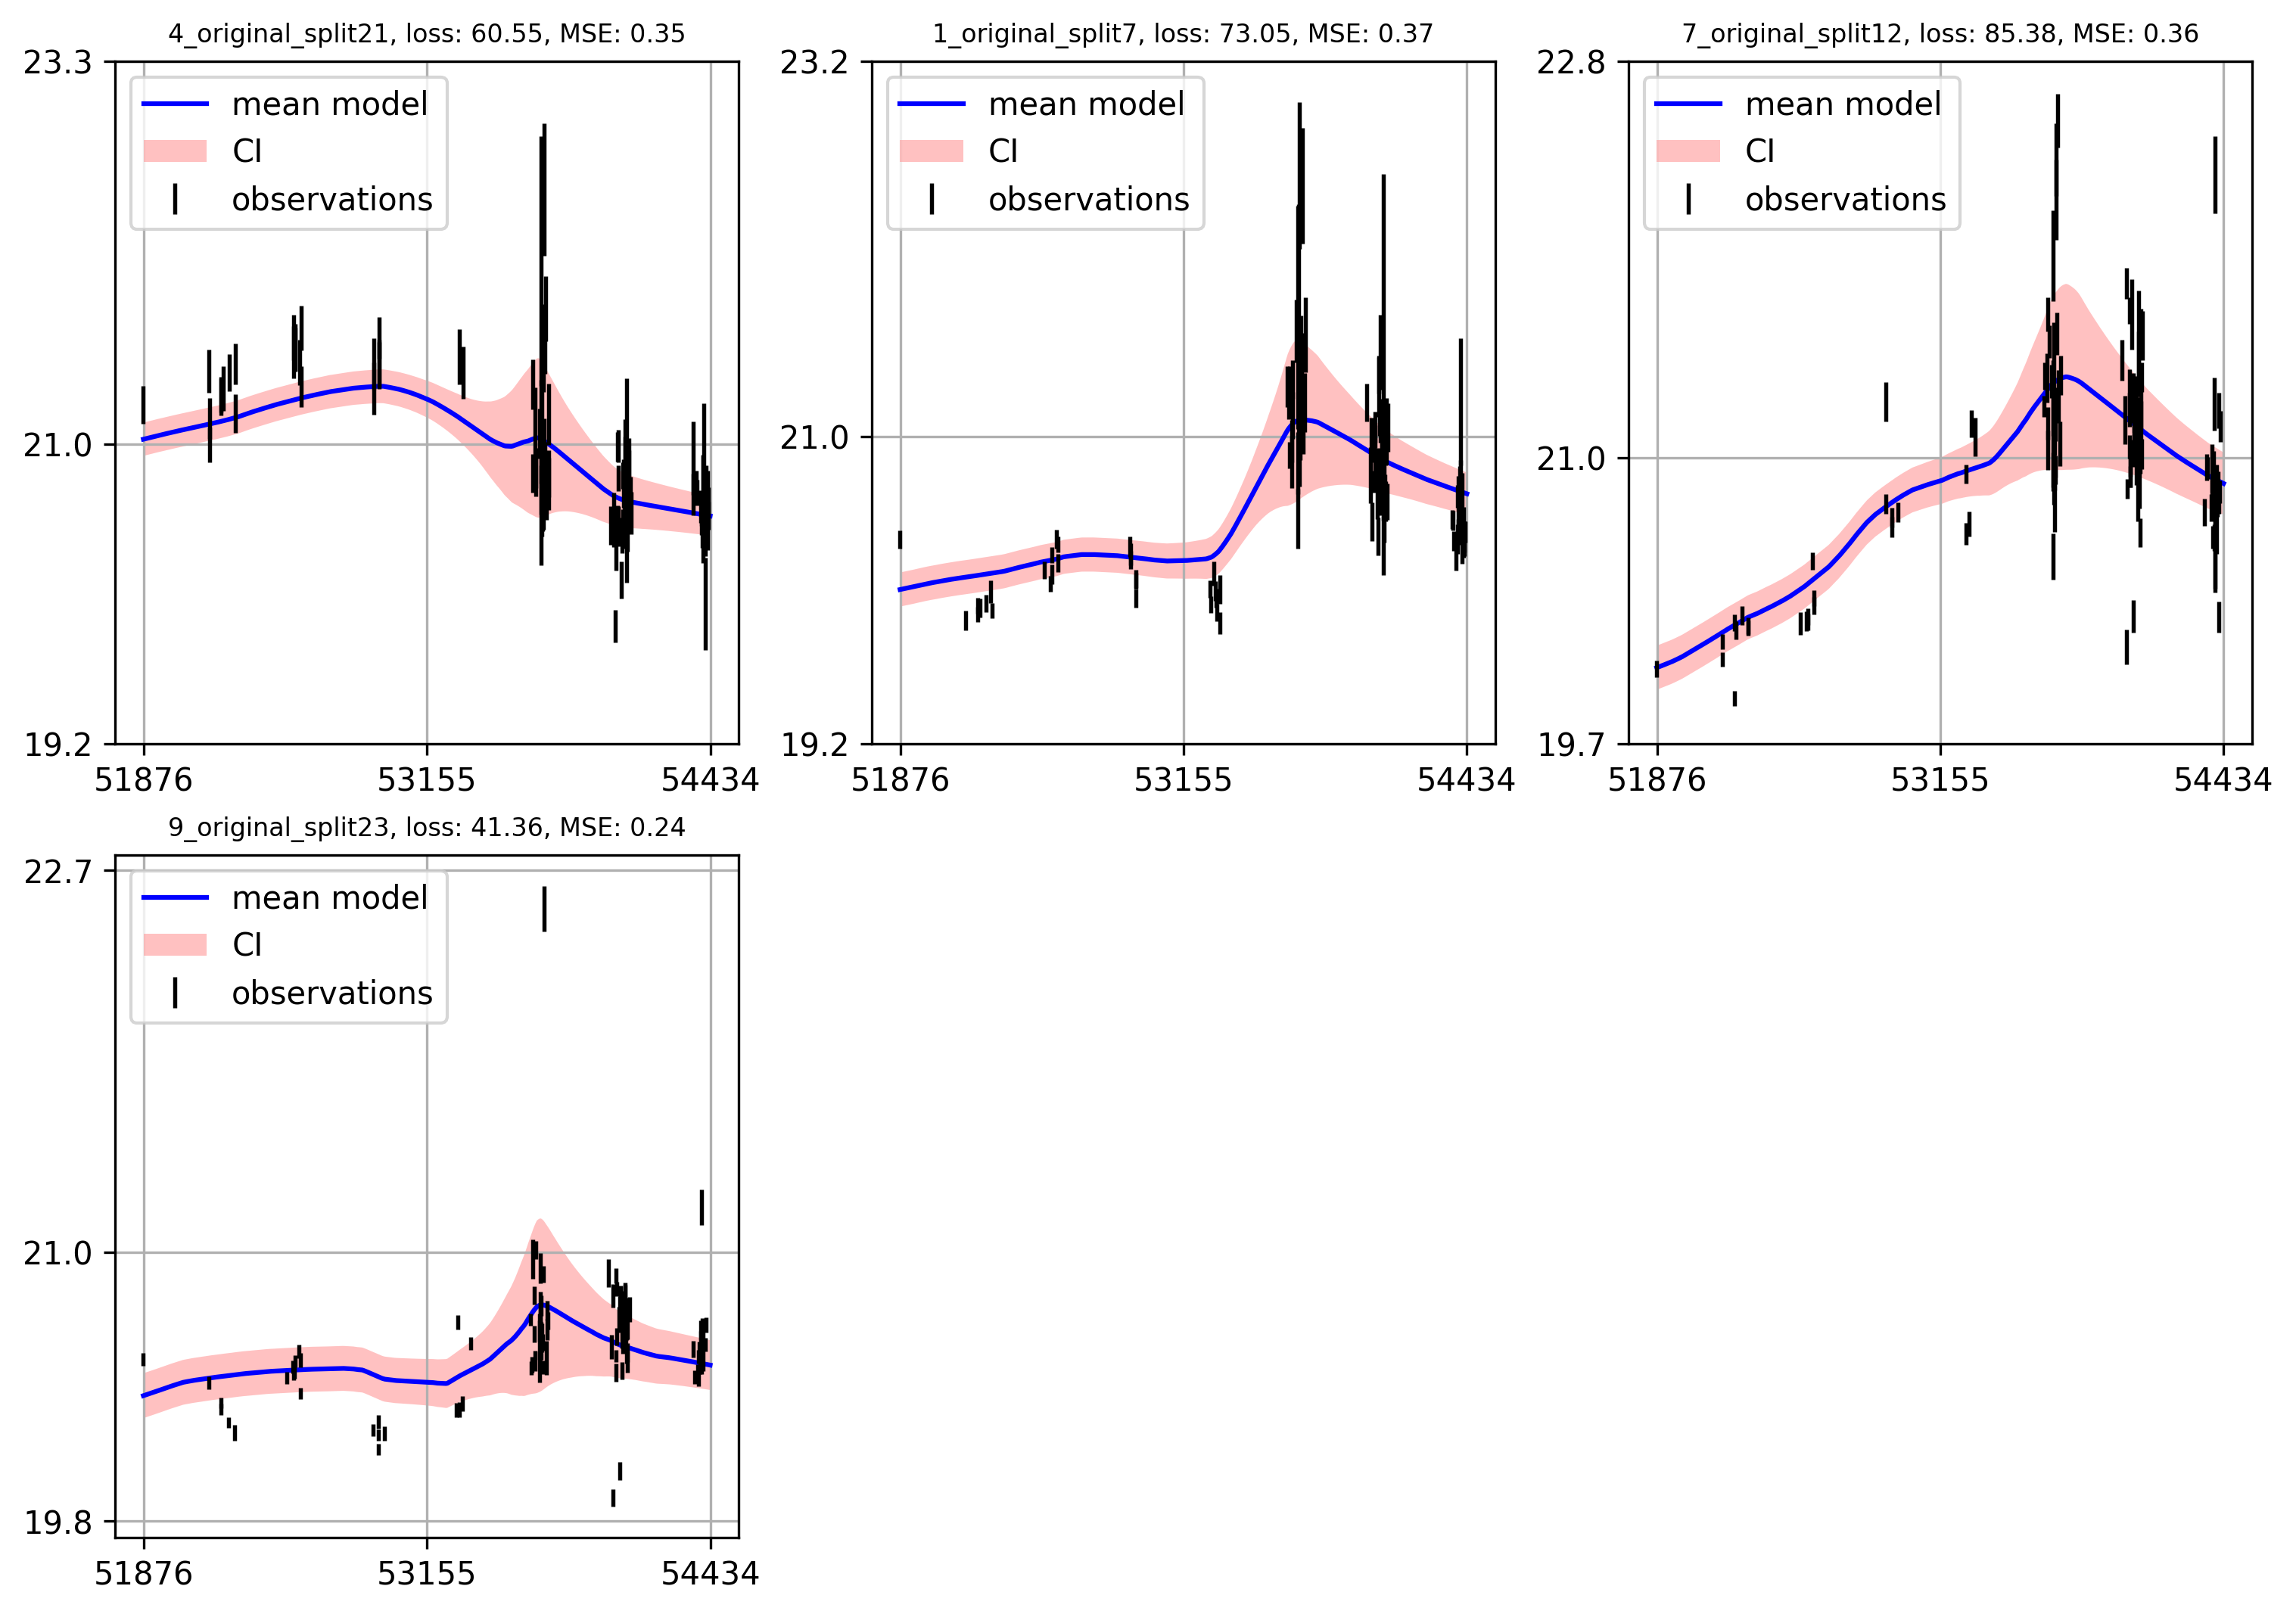

In [17]:
#prediction and plotting train data
trainMetrics=pop.plot_train_light_curves(model, trainLoader, criterion, mseMetric, plot_function2, device,tr)

In [18]:
savetrain=pop.save_train_metrics(OUTPUT_PATH, trainMetrics)#saving train metrics

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 32.14it/s]


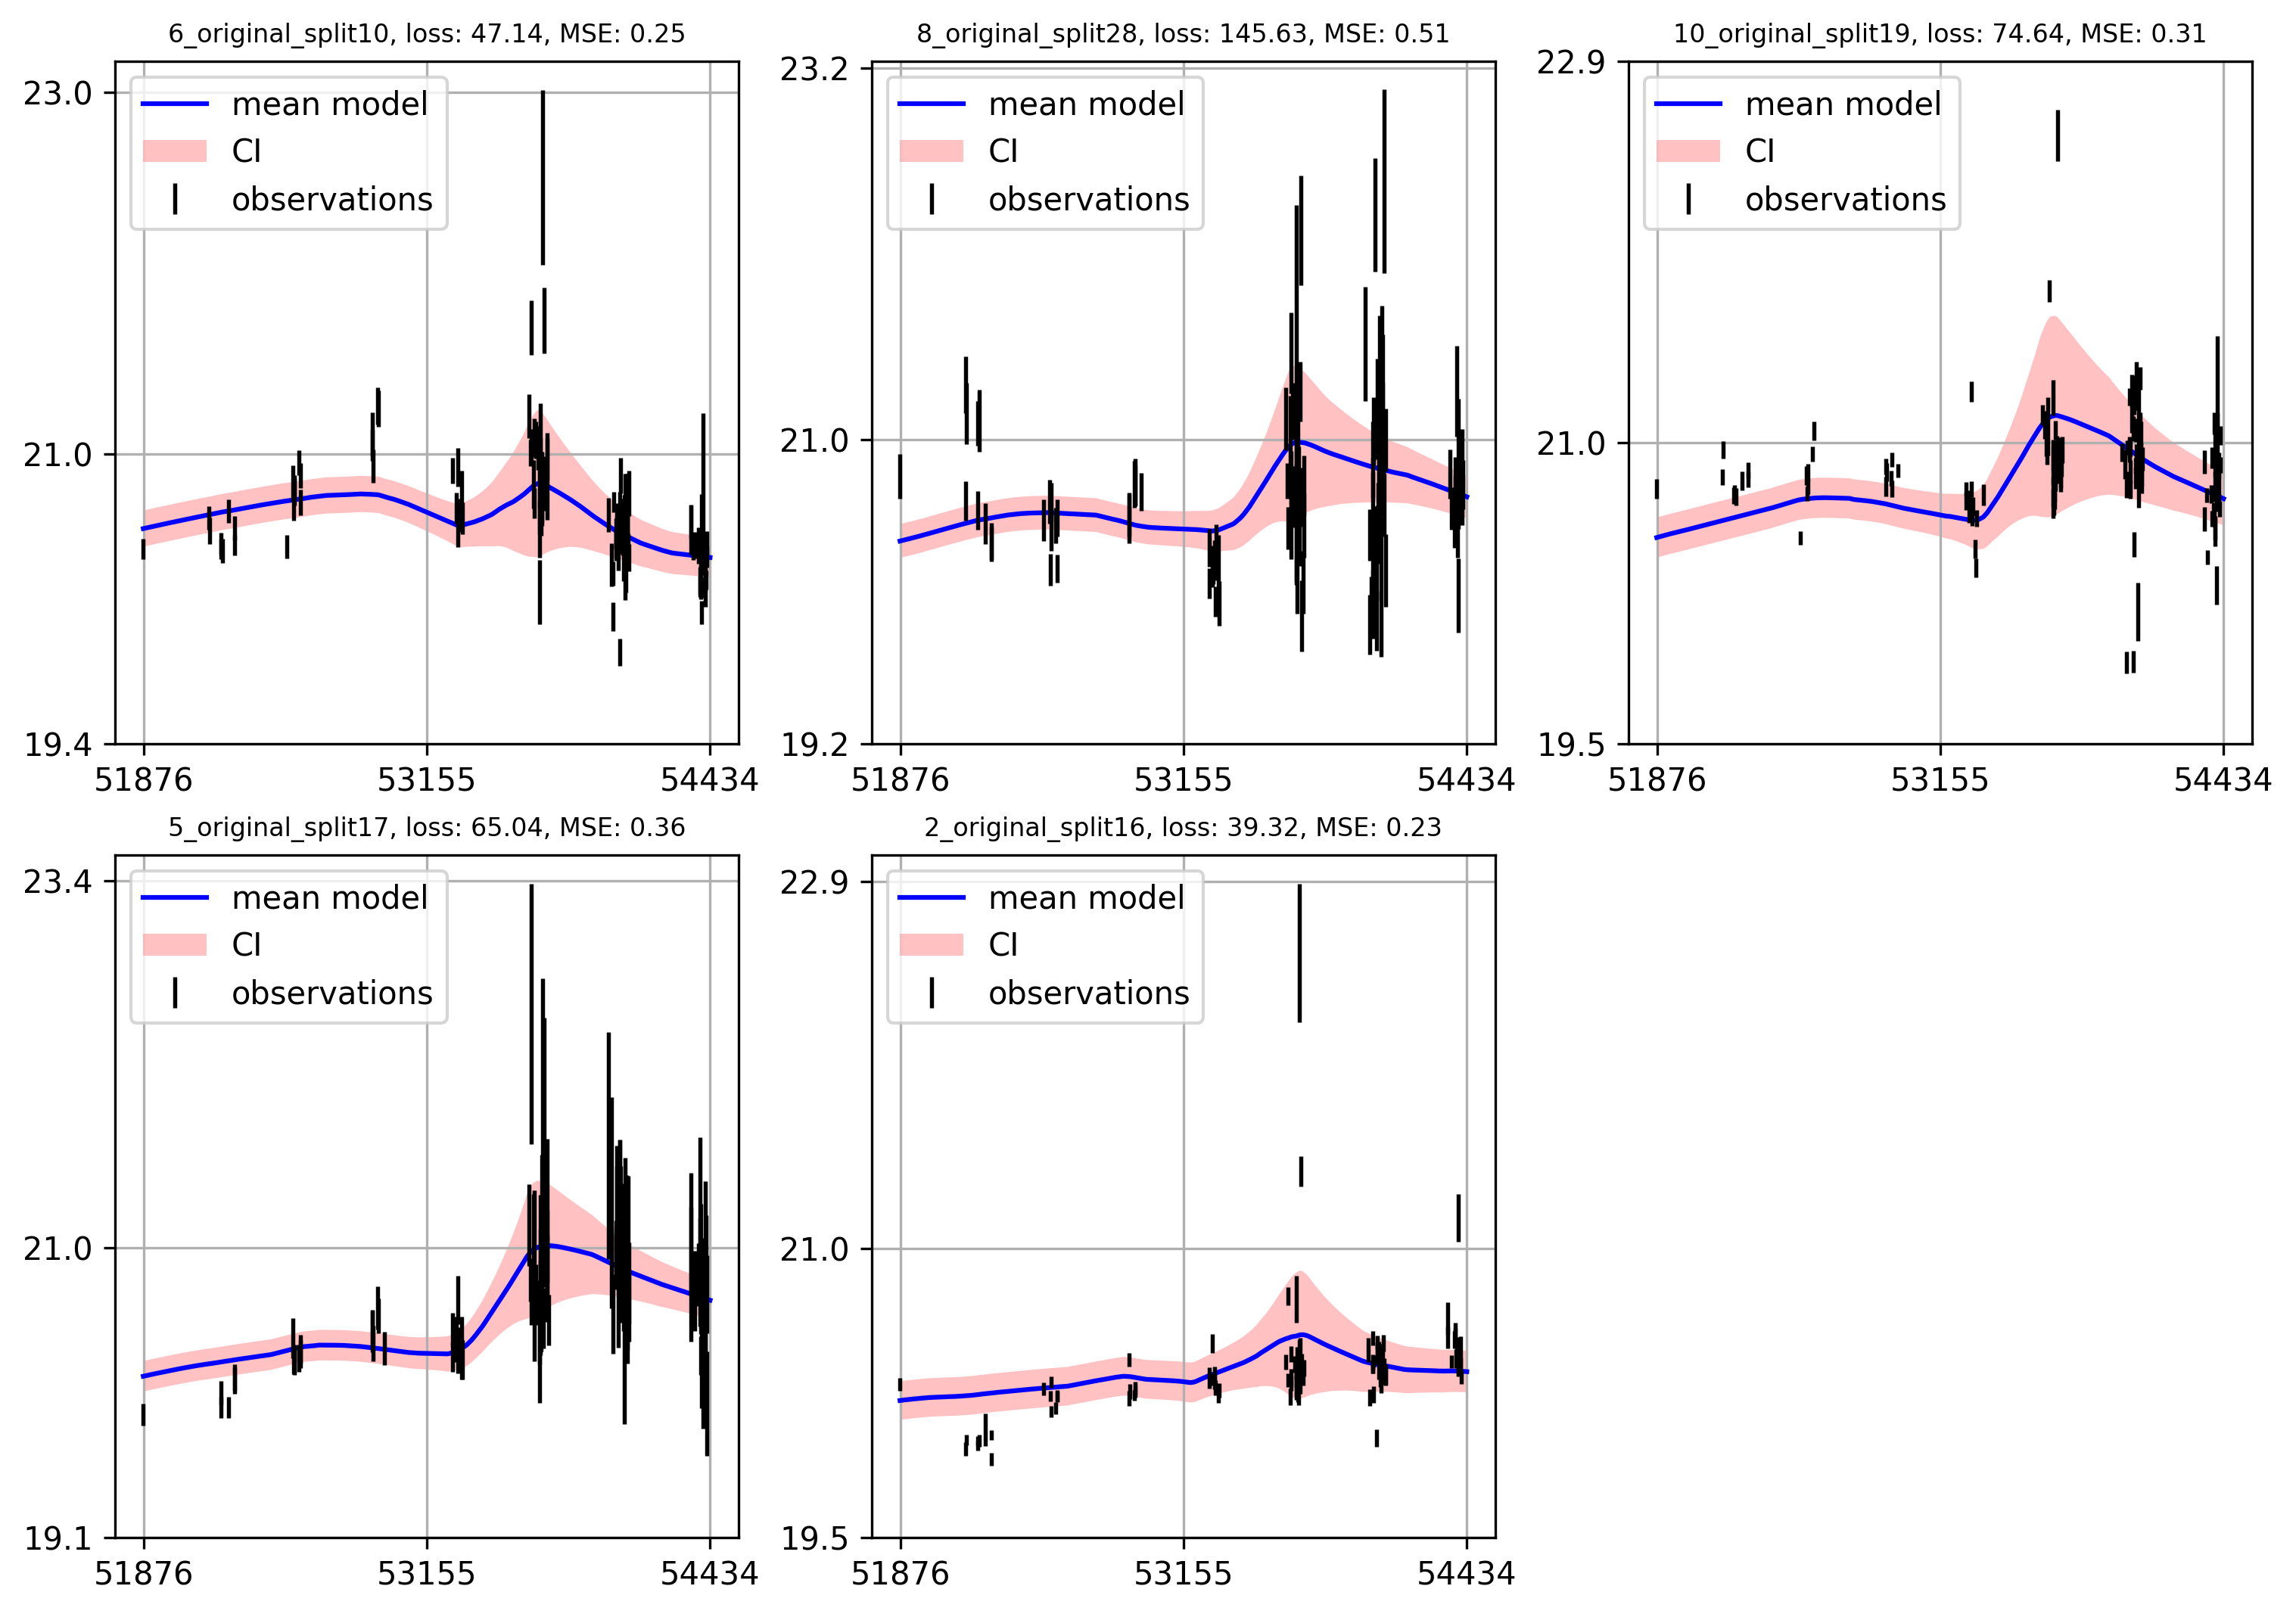

In [19]:
#prediction and plotting val data
valMetrics=pop.plot_val_light_curves(model, valLoader, criterion, mseMetric, plot_function2, device,tr)

In [20]:
saveval=pop.save_val_metrics(OUTPUT_PATH, valMetrics)#saving the val metrics

# THE END